In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random
from pycontractions import Contractions
import gensim.downloader as api

In [2]:
#Import South Park Script
southpark = pd.read_csv("All-seasons.csv")
southpark.head()

,Season,Episode,Character,Line
0,1,1,Boys,"School day, school day, teacher's golden ru...\n"
1,1,1,Kyle,"Ah, damn it! My little brother's trying to fol..."
2,1,1,Ike,Zeeponanner.\n
3,1,1,Kyle,"Ike, you can't come to school with me. \n"
4,1,1,Cartman,"Yeah, go home you little dildo.\n"


In [3]:
#Dialogue spoken by Cartman
ky = southpark['Character'] == 'Kyle'
kyle = southpark[ky]
kyle.head()

,Season,Episode,Character,Line
1,1,1,Kyle,"Ah, damn it! My little brother's trying to fol..."
3,1,1,Kyle,"Ike, you can't come to school with me. \n"
5,1,1,Kyle,"Dude, don't call my brother a dildo!\n"
7,1,1,Kyle,"Well, I don't know... and I'll bet Cartman do..."
9,1,1,Kyle,"Well, what?\n"


In [4]:
#Reset index
kyle = kyle.reset_index(drop=True)
kyle.head()

,Season,Episode,Character,Line
0,1,1,Kyle,"Ah, damn it! My little brother's trying to fol..."
1,1,1,Kyle,"Ike, you can't come to school with me. \n"
2,1,1,Kyle,"Dude, don't call my brother a dildo!\n"
3,1,1,Kyle,"Well, I don't know... and I'll bet Cartman do..."
4,1,1,Kyle,"Well, what?\n"


In [5]:
# Expand Contractions
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
kyle['Line_process'] = kyle['Line'].apply(decontracted)
kyle['Line_process'].head(25)

0     Ah, damn it! My little brother is trying to fo...
1           Ike, you can not come to school with me. \n
2               Dude, do not call my brother a dildo!\n
3     Well, I do not know...  and I will bet Cartman...
4                                         Well, what?\n
5     Yeah, check this one out. Ready, Ike? Kick the...
6                                     Kick the baby. \n
7                                 Really? What about?\n
8                                            Totally!\n
9     Yeah, they abduct people and they mutilate cow...
10                              Yeah, fat boy saw it!\n
11                             What is an anal probe?\n
12         Whoa! They gave you an anal probe Cartman?\n
13    We told you they were real Cartman. Sorry to h...
14              Why are you walkin' so funny Cartman?\n
15                                  No, Ike, go home.\n
16              This is it. This one is for the game.\n
17                                    Kick the b

In [6]:
#Lowercase
kyle['Line_process'] = kyle['Line_process'].apply(lambda x: " ".join(x.lower() for x in x.split()))
kyle['Line_process'].head(25)

0     ah, damn it! my little brother is trying to fo...
1              ike, you can not come to school with me.
2                 dude, do not call my brother a dildo!
3     well, i do not know... and i will bet cartman ...
4                                           well, what?
5     yeah, check this one out. ready, ike? kick the...
6                                        kick the baby.
7                                   really? what about?
8                                              totally!
9      yeah, they abduct people and they mutilate cows.
10                                yeah, fat boy saw it!
11                               what is an anal probe?
12           whoa! they gave you an anal probe cartman?
13    we told you they were real cartman. sorry to h...
14                why are you walkin' so funny cartman?
15                                    no, ike, go home.
16                this is it. this one is for the game.
17                                       kick th

In [7]:
#Remove Stop Words
from nltk.corpus import stopwords
stop = stopwords.words('english')
kyle['Line_process'] = kyle['Line_process'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
kyle['Line_process'].head(25)

0     ah, damn it! little brother trying follow scho...
1                                  ike, come school me.
2                             dude, call brother dildo!
3                well, know... bet cartman know either!
4                                           well, what?
5           yeah, check one out. ready, ike? kick baby!
6                                            kick baby.
7                                        really? about?
8                                              totally!
9                    yeah, abduct people mutilate cows.
10                                yeah, fat boy saw it!
11                                          anal probe?
12                       whoa! gave anal probe cartman?
13                   told real cartman. sorry hear ass.
14                               walkin' funny cartman?
15                                    no, ike, go home.
16                                        it. one game.
17                                           kic

In [8]:
#Remove Punctuation
kyle['Line_process'] = kyle['Line_process'].str.replace('[^\w\s]','')
kyle['Line_process'].head(25)

0     ah damn it little brother trying follow school...
1                                    ike come school me
2                               dude call brother dildo
3                     well know bet cartman know either
4                                             well what
5                yeah check one out ready ike kick baby
6                                             kick baby
7                                          really about
8                                               totally
9                      yeah abduct people mutilate cows
10                                  yeah fat boy saw it
11                                           anal probe
12                         whoa gave anal probe cartman
13                     told real cartman sorry hear ass
14                                 walkin funny cartman
15                                       no ike go home
16                                          it one game
17                                            ki

In [9]:
#Tokenize
kyle['word_tokens'] = kyle['Line_process'].apply(word_tokenize)
kyle['sent_tokens'] = kyle['Line'].apply(sent_tokenize)

In [10]:
kyle['word_tokens'].head(25)

0     [ah, damn, it, little, brother, trying, follow...
1                               [ike, come, school, me]
2                          [dude, call, brother, dildo]
3              [well, know, bet, cartman, know, either]
4                                          [well, what]
5       [yeah, check, one, out, ready, ike, kick, baby]
6                                          [kick, baby]
7                                       [really, about]
8                                             [totally]
9                [yeah, abduct, people, mutilate, cows]
10                            [yeah, fat, boy, saw, it]
11                                        [anal, probe]
12                   [whoa, gave, anal, probe, cartman]
13              [told, real, cartman, sorry, hear, ass]
14                             [walkin, funny, cartman]
15                                  [no, ike, go, home]
16                                      [it, one, game]
17                                         [kick

In [11]:
#Lemmatize
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]
kyle['word_tokens'].apply(lemmatize_text).head(25)

0     [ah, damn, it, little, brother, trying, follow...
1                               [ike, come, school, me]
2                          [dude, call, brother, dildo]
3              [well, know, bet, cartman, know, either]
4                                          [well, what]
5       [yeah, check, one, out, ready, ike, kick, baby]
6                                          [kick, baby]
7                                       [really, about]
8                                             [totally]
9                 [yeah, abduct, people, mutilate, cow]
10                            [yeah, fat, boy, saw, it]
11                                        [anal, probe]
12                   [whoa, gave, anal, probe, cartman]
13               [told, real, cartman, sorry, hear, as]
14                             [walkin, funny, cartman]
15                                  [no, ike, go, home]
16                                      [it, one, game]
17                                         [kick

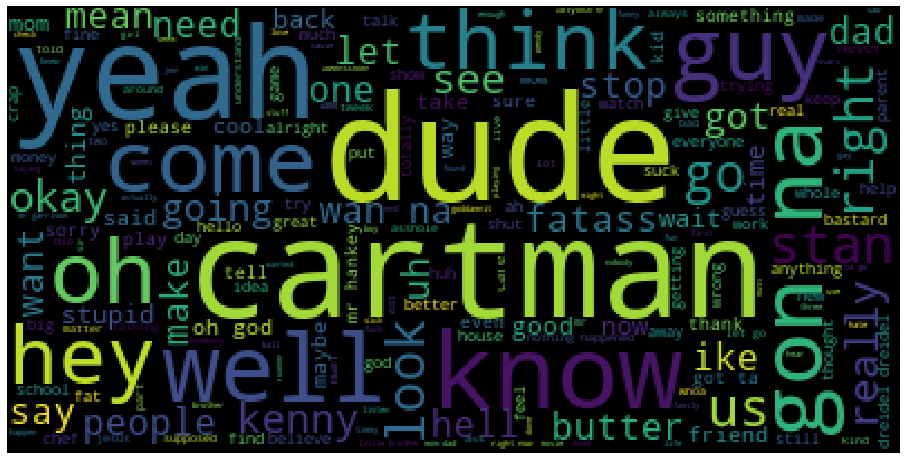

In [12]:
#Wordcloud
wordcloud_cartman = WordCloud().generate(kyle['word_tokens'].to_string())
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud_cartman)
plt.axis("off")
plt.savefig('Kyle_Wordcloud.png')
plt.show()

In [13]:
#Bag of Word Model
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
vec = CountVectorizer().fit(kyle['Line_process'])
bag_of_words = vec.transform(kyle['Line_process'])
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = np.array(sorted(words_freq, key = lambda x: x[1], reverse=True))

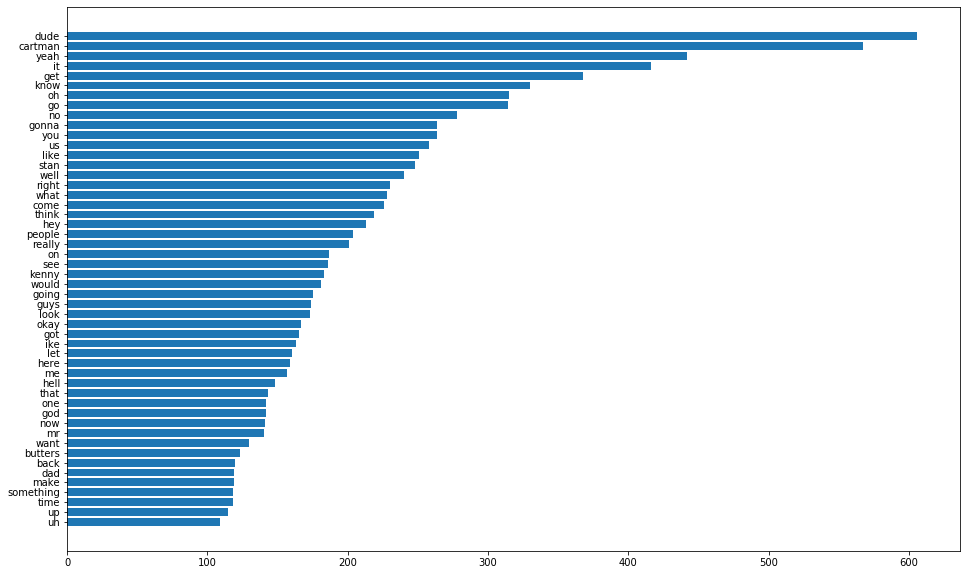

In [15]:
n = 50
plt.figure(figsize=(16, 10))
plt.barh(-np.arange(n), words_freq[:n, 1].astype(float), height=.8)
plt.yticks(ticks=-np.arange(n), labels=words_freq[:n, 0])
plt.savefig('Kyle_BOW.png')
plt.show()

In [16]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer  
vect = TfidfVectorizer().fit(kyle['Line_process'])
tfidf = vect.transform(kyle['Line_process'])
sum_tfidf = tfidf.sum(axis=0)
tfidf_freq = [(word, sum_tfidf[0, idx]) for word, idx in vect.vocabulary_.items()]
tfidf_freq = np.array(sorted(tfidf_freq, key = lambda x: x[1], reverse=True))

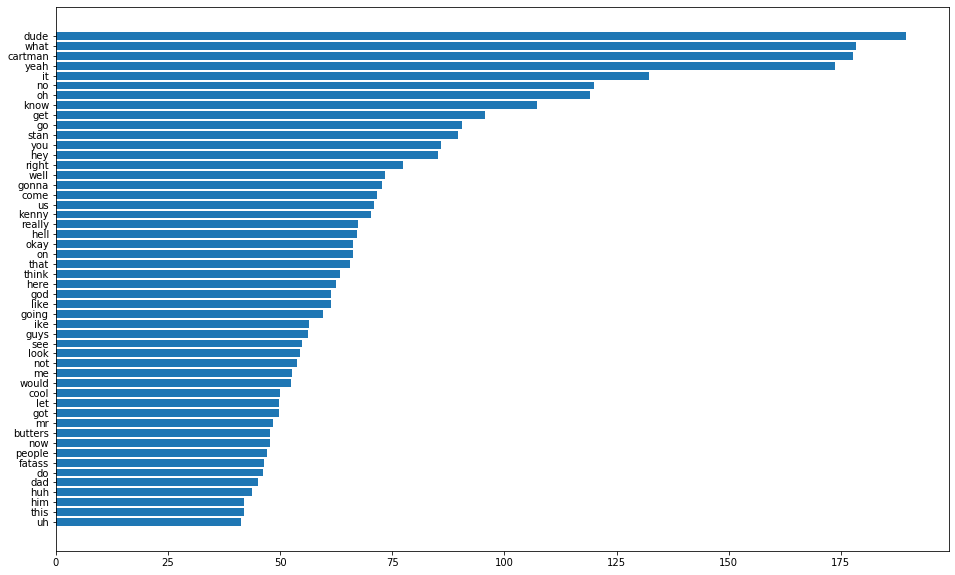

In [17]:
n = 50
plt.figure(figsize=(16, 10))
plt.barh(-np.arange(n), tfidf_freq[:n, 1].astype(float), height=.8)
plt.yticks(ticks=-np.arange(n), labels=tfidf_freq[:n, 0])
plt.savefig('Kyle_TFIDF.png')
plt.show()